In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
import joblib

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [6]:
# Lading dataset
df= pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Inspecting Data


In [9]:
df.shape

(891, 12)

Here The dataset contains 891 rows and 12 columns
Out of the 12, One is the target variable and 11 are input variables.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data has 2 float, 5 integer and 5 object attributes.
There are some missing values.

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that we have many missing values. SO we will try to fill missing values in Data-preprocessing step.

# Statistical Summary

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


The attributes "Age, SibSp, Parch, Fare" has large difference in their 75% and maximum value, which indicates the presence of outliers in the dataset.
The attribute Fare has large difference in thier mean and median value.

# Exploratory Data Analysis

In [14]:
df1 = df.copy()

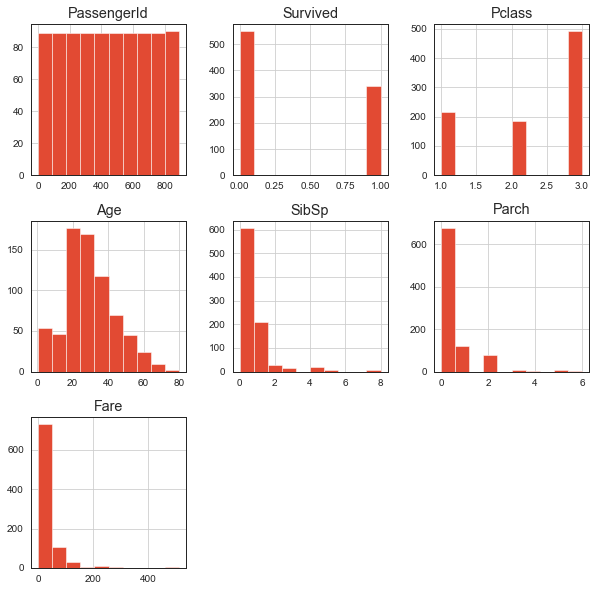

In [15]:
df1.hist(figsize=(10,10));

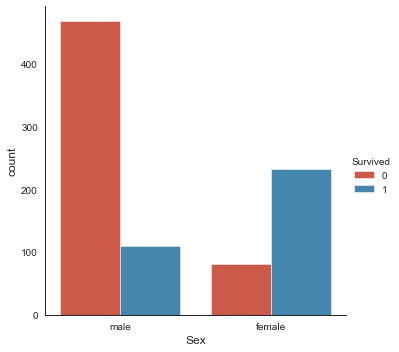

In [16]:
sns.catplot(x="Sex", hue="Survived", kind="count", data =df1)

It can be approximated that the survival rate of men is around 20% and that of women is around 75%.
Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

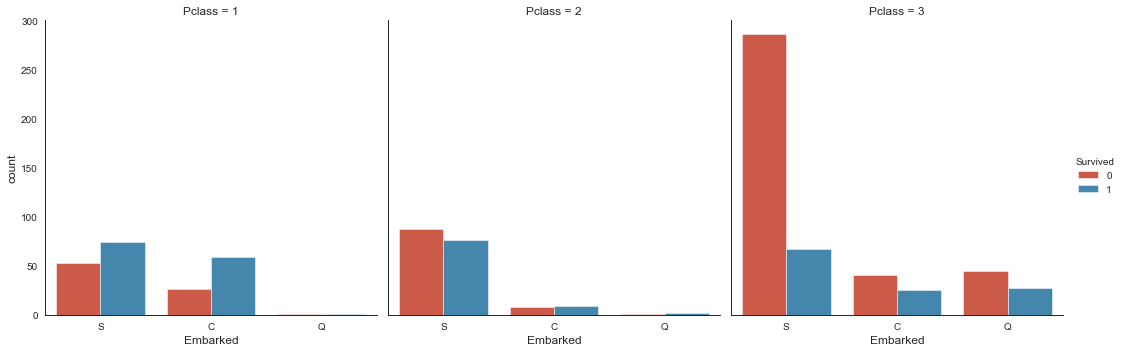

In [17]:
sns.catplot(x ='Embarked',hue ='Survived', kind ='count', col ='Pclass', data =df1)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

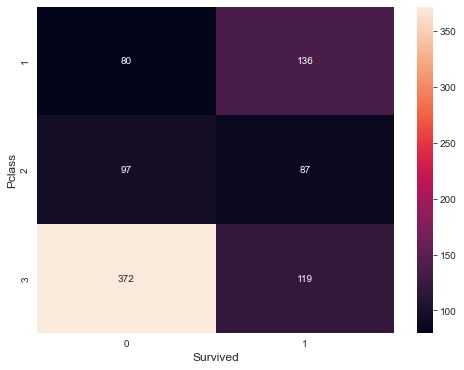

In [18]:
# Group the dataset by Pclass and Survived and gthen unstack them 
pclass_grp = df1.groupby(['Pclass', 'Survived'])
pclass_survived = pclass_grp.size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt='d')

Higher-class passengers had more survival rate than the lower class ones or vice versa ie, Class 1 passengers have a higher survival chance compared to classes 2 and 3.
It implies that Pclass contributes a lot to a passenger’s survival rate.

<AxesSubplot:xlabel='Age_range', ylabel='Survived'>

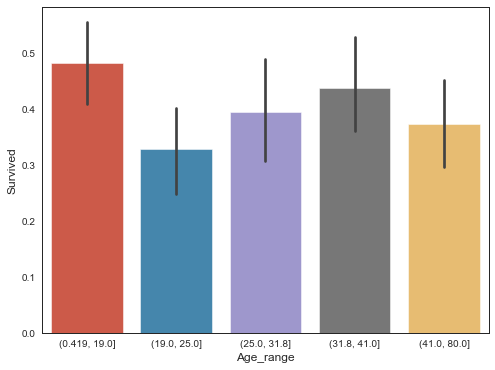

In [19]:
df1['Age_range'] = pd.qcut(df1['Age'], 5)
sns.barplot(x ='Age_range', y ='Survived', data =df1)

It can be concluded that childrens of age between 4 to 19 have given moe priority ,as their survival rate is more as compared to others.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

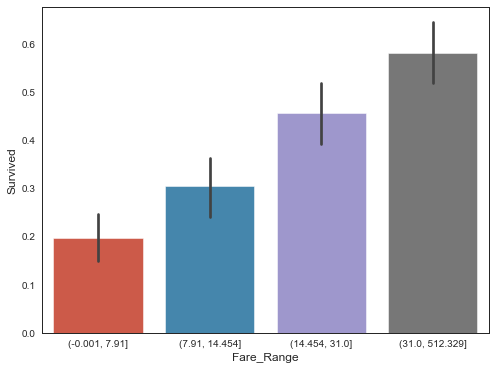

In [21]:
df1['Fare_Range'] = pd.qcut(df1['Fare'],4)
sns.barplot(x ='Fare_Range', y ='Survived', data =df1)

It can be concluded that if a passenger paid a higher fare, the survival rate is more.

In [26]:
#Adding a cloumn Family_size
df1['Family_Size'] = 0
df1['Family_Size'] = df1['Parch'] + df1['SibSp']

#Adding colmun Alone
df1['Alone'] =0 
df1.loc[df1.Family_size ==0, 'Alone']=1

#Factorplot for Family_size
sns.factorplot(x ='Family_Size' y='Survived', data =df1)
#Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data =df1)

SyntaxError: invalid syntax (3469180089.py, line 10)

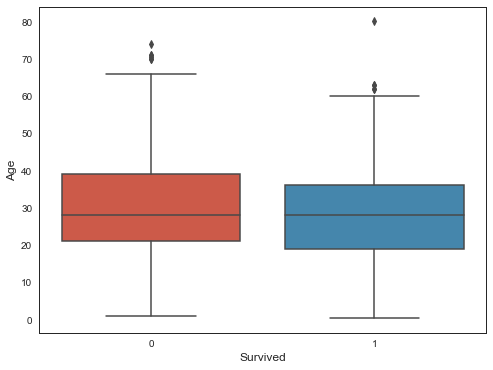

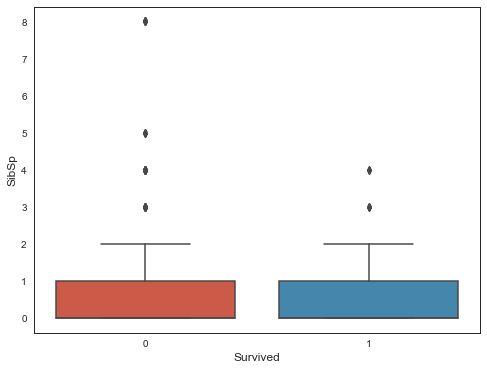

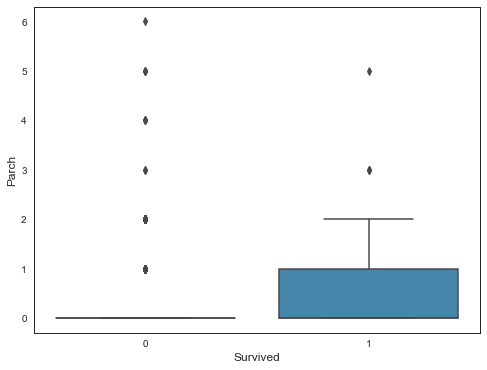

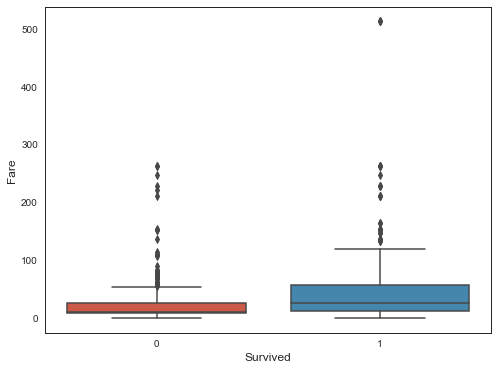

In [27]:
col =['Age','SibSp','Parch','Fare']
for i in col:
    sns.boxplot(df['Survived'],df[i])
    plt.show()

There are some outliers with respect to survived column.
By statsical summary, we observe some outliers, and graphical repsentation confirms the presnece of outliers.

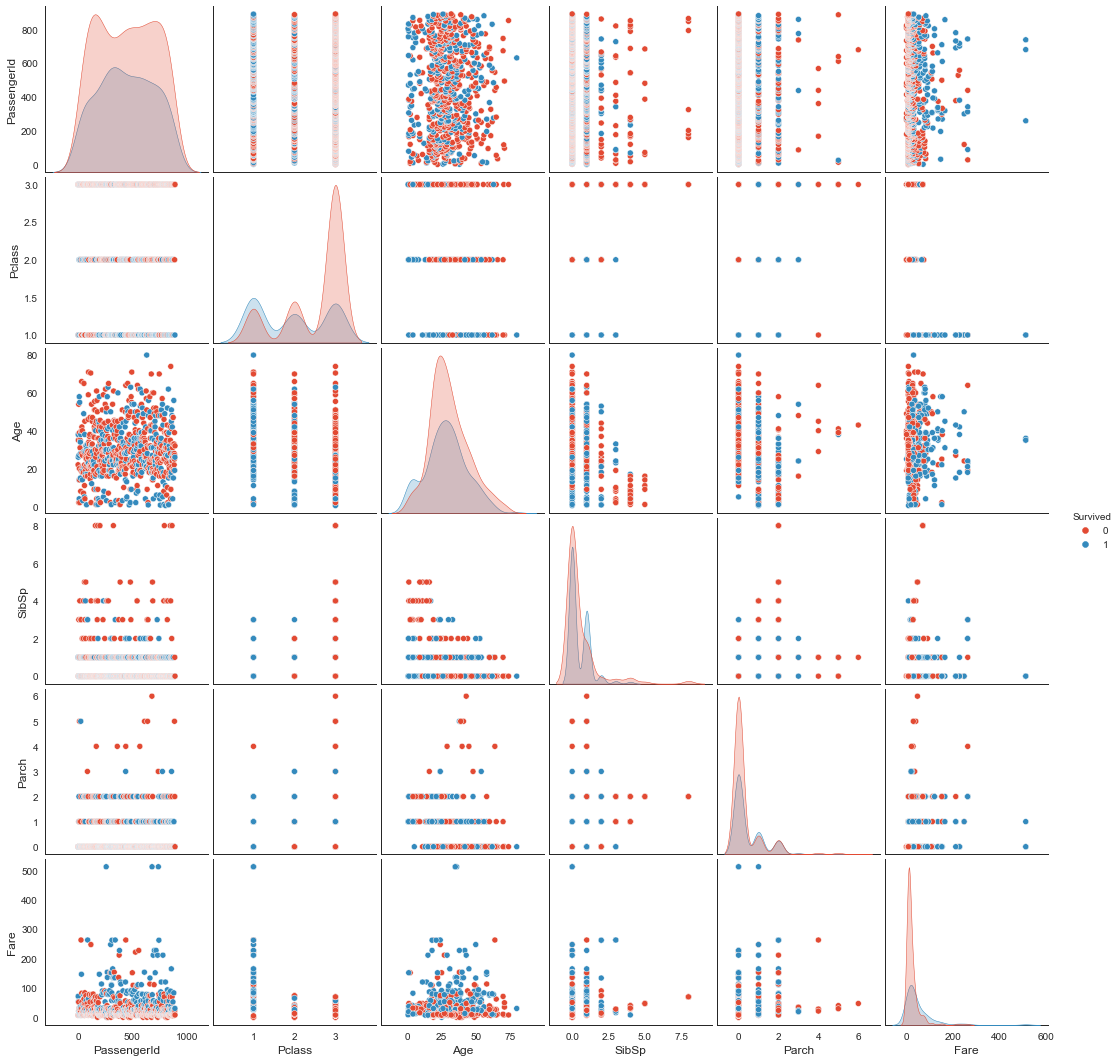

In [28]:
sns.pairplot(df, hue='Survived')

<AxesSubplot:>

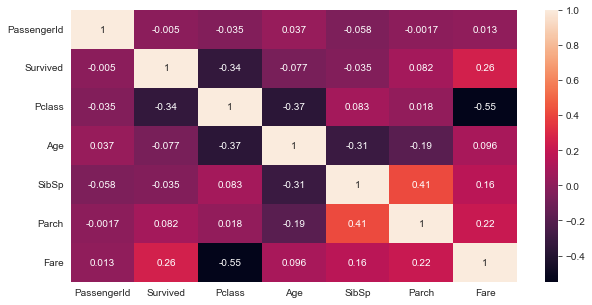

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

The attribute Pclass and Fare has high Negative correlation with each other
The attributes SibSp, Pclass has moderate Negative correlation with Age.
Survived (Target variable) has moderate Negative correlation with Pclass.
Survived (Target variable) has moderate Positvie correlation with Fare.

# Data Preprocessing 
1. Handling Missing Values
2. Droping irrelevent columns
3. Convert categorical data into numerical form

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Filling missing values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df['Age'].fillna(df['Age'].mean(),inplace= True)
df["Embarked"].fillna(df['Embarked'].mode()[0], inplace=True)

In [33]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
df['Cabin'].isnull().sum()/len(df)*100

77.10437710437711

As the total 891 rows , In 'Cabin' there are more than 75% data is missing , so it is irrelevant to fill it

# Dropping Irrelevent columns


In [35]:
df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Coverting Categorical varilable into Numerical form

In [37]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
#Splitting data 

X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [39]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
# Split data into train and test set 


In [42]:
x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=42)

In [43]:
print("Shape of Dataset",df.shape)
print("Shape of Input Features", x_train.shape, y_train.shape)
print("Shape of Output Features", x_test.shape, y_test.shape)

Shape of Dataset (891, 9)
Shape of Input Features (668, 8) (668,)
Shape of Output Features (223, 8) (223,)


# Logistic Regression

In [44]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)

LogisticRegression()

In [45]:
# Prediction on Test and Train Set
pred_logistic_test =clf.predict(x_test)
pred_logistic_train =clf.predict(x_train)

In [46]:
print('Training Accuracy:', accuracy_score(y_train,pred_logistic_train))
print('Test Accuracy:', accuracy_score(y_test,pred_logistic_test))

Training Accuracy: 0.8038922155688623
Test Accuracy: 0.8026905829596412


# Decision Tree

In [49]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

In [51]:
print('Training Accuracy:', accuracy_score(y_train, pred_dt_train))
print('Test Accuracy:', accuracy_score(y_test, pred_dt_test))

Training Accuracy: 0.9820359281437125
Test Accuracy: 0.7488789237668162


In [55]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_dt_test))

print('\nClassification Report:')
print(classification_report(y_test, pred_dt_test))

Confusion Matrix:
[[107  27]
 [ 29  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       134
           1       0.69      0.67      0.68        89

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



# Random Forest

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

In [60]:
print('Training Accuracy:', accuracy_score(y_train, train_pred_rf))
print('Test Accuracy:', accuracy_score(y_test, pred_rf))

Training Accuracy: 0.9820359281437125
Test Accuracy: 0.7847533632286996


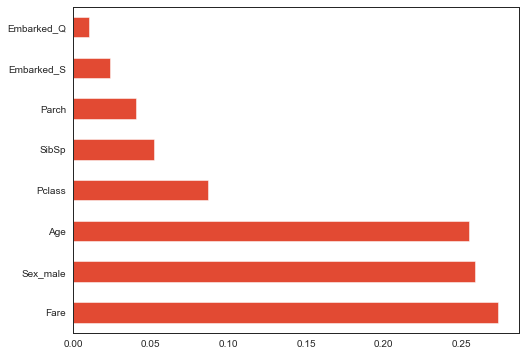

In [88]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [64]:
rf1 = RandomForestClassifier()

In [65]:
grid = { 'max_depth' :[3,5,8, None],
        'min_samples_split': [2,3],
        'max_features': [3,4,5], 
        'n_estimators' :[10,20,50,100]
}

grid_cv = GridSearchCV(estimator=rf1,
                       param_grid= grid,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=5,
                        return_train_score=True
                      )
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, None],
                         'max_features': [3, 4, 5], 'min_samples_split': [2, 3],
                         'n_estimators': [10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [66]:
grid_cv.best_params_

{'max_depth': 8, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 20}

In [67]:
grid_cv.best_score_

0.8338121422960386

In [71]:
rf2 = grid_cv.best_estimator_

rf2.fit(x_train, y_train)

#prediction
rf2_pred_train = rf2.predict(x_train)
rf2_pred = rf2.predict(x_test)


In [72]:
rf2_pred_train =rf2.predict(x_train)
rf2_pred = rf2.predict(x_test)

In [74]:
print('Training Accuracy:', accuracy_score(y_train, rf2_pred_train))
print('Test Accuracy:', accuracy_score(y_test, rf2_pred))

Training Accuracy: 0.9176646706586826
Test Accuracy: 0.8340807174887892


# K-Nearest Neighbors

In [75]:
sc = StandardScaler()

In [77]:
sc_input = sc.fit_transform(df.drop(['Survived'],axis =1))
sc_input

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.62380254]])

In [79]:
df_input = pd.DataFrame(sc_input, columns= df.columns[1:])
df_input

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.615838
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.615838
888,0.827377,0.000000,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.615838
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.623803


In [80]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(df_input, df['Survived'], test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
knn_pred_train = knn.predict(X_train_scaled)
knn_pred = knn.predict(X_test_scaled)

In [82]:
print('Testing Accuracy:', accuracy_score(Y_train, knn_pred_train))
print('Test Accuracy:', accuracy_score(Y_test, knn_pred))

Testing Accuracy: 0.985553772070626
Test Accuracy: 0.7798507462686567


In [92]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','KNN' ,'Decision Tree'],
    'Score': [0.80,0.98,0.98,0.98]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.98,Random Forest
0.98,KNN
0.98,Decision Tree
0.80,Logistic Regression
